In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

##Creating an deep neural network model for insurance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are Alphabet (objects) in data that need to converted to numeric data

In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


There is alot of variance in data so we have to normalize it

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
)

x=insurance.drop('charges',axis=1)
y=insurance['charges']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

ct.fit(x_train)

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [ ]:
x_train_normal[0]

array([0.7826087 , 0.49001137, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

Creating an model

In [ ]:
#create model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

#fit data into the model
history = insurance_model.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 13111.0664 - mae: 13111.0664
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 13110.4863 - mae: 13110.4863
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 13109.8555 - mae: 13109.8555
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 13109.1318 - mae: 13109.1318
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 13108.2529 - mae: 13108.2529
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 13107.1475 - mae: 13107.1475
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 13105.7168 - mae: 13105.7168
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 13103.8389 - mae: 13103.8389
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 13101.3408 - mae: 13101.3408
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 13098.0156 - mae: 13098.0156

In [ ]:
insurance_model.evaluate(x_test_normal,y_test)

34/34 [==============================] - 0s 1ms/step - loss: 3646.5442 - mae: 3646.5442


[3646.544189453125, 3646.544189453125]

Text(0.5, 0, 'mae')

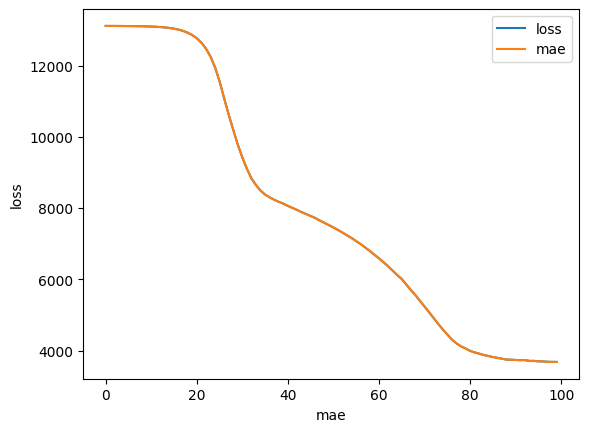

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("mae")

Our model is not bad but we will improve it
1.   By add 1 more layer
2.   Changing optimizer function
3.   Add more layers and change learning rate



In [ ]:
#create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

#fit the data
history_2 = insurance_model_2.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 13110.6201 - mae: 13110.6201
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 13108.3643 - mae: 13108.3643
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 13104.5635 - mae: 13104.5635
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 13095.4941 - mae: 13095.4941
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 13063.2686 - mae: 13063.2686
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 12828.4209 - mae: 12828.4209
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 9669.8721 - mae: 9669.8721
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 7848.6387 - mae: 7848.6387
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 6690.3955 - mae: 6690.3955
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 5738.5366 - mae: 5738.5366
Epoch 1

In [ ]:
insurance_model_2.evaluate(x_test_normal,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 4346.3521 - mae: 4346.3521


[4346.35205078125, 4346.35205078125]

Text(0.5, 0, 'mae')

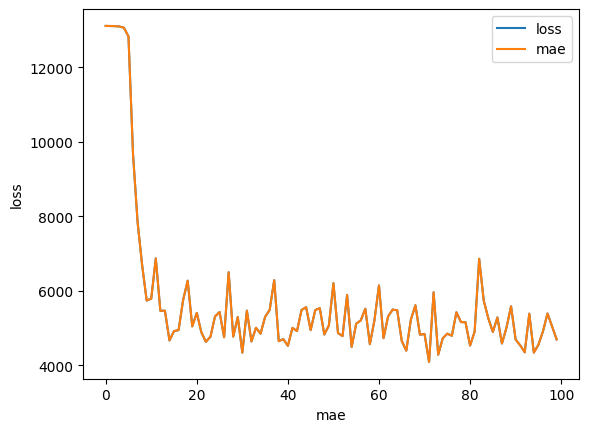

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("mae")

In [ ]:
#create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

#fit the data
history_3 = insurance_model_3.fit(x_train_normal,y_train,epochs=500)

Epoch 1/500
9/9 [==============================] - 3s 4ms/step - loss: 13109.7490 - mae: 13109.7490
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 13106.2627 - mae: 13106.2627
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 13101.2793 - mae: 13101.2793
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 13093.7539 - mae: 13093.7539
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 13082.6592 - mae: 13082.6592
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 13066.9932 - mae: 13066.9932
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 13045.6250 - mae: 13045.6250
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 13017.6553 - mae: 13017.6553
Epoch 9/500
9/9 [==============================] - 0s 4ms/step - loss: 12981.9316 - mae: 12981.9316
Epoch 10/500
9/9 [==============================] - 0s 4ms/step - loss: 12937.6025 - mae: 12937.6025

In [ ]:
insurance_model_3.evaluate(x_test_normal,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 3426.7673 - mae: 3426.7673


[3426.767333984375, 3426.767333984375]

Text(0.5, 0, 'mae')

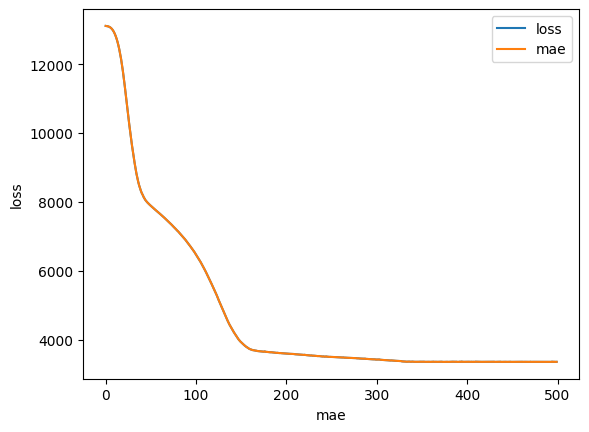

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("mae")

Comparing the 3 models

In [ ]:
insurance_model.evaluate(x_test_normal,y_test)
insurance_model_2.evaluate(x_test_normal,y_test)
insurance_model_3.evaluate(x_test_normal,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 3426.7673 - mae: 3426.7673


[3426.767333984375, 3426.767333984375]